# Homework 8 Phase Portraits and Cycles





# Phase portrait analysis of a chemostat

Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth (say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

Let:
- V be the volume of the chemost stat and equal to 1$L$.
- Q be the fixed volumetric flow rate and equal to 1 $L/h$.
- q = Q/V be the dilution rate ($h^{-1}$)
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/L$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/L.
- r be the growth rate of bacteria ($h^{-1}$) where $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$. Let $K_m = 4$ and $R_{max}=2$. 
- y is the yield parameter equal to 0.25 $unitless$.

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

.

1. Is this system linear or nonlinear? Defend your answer below. **Use a text cell.**

##### _The system is nonlinear as the the degree is not equal to one._

2. Perform a phase plane analysis of this system. Be sure to carefully consider the bounds of your axes. If you use the program plotdf from class, be sure to read the help file. Be sure to add example trajectories to your plot that start at (x_0,y_0) = (1,1),(3,9) and (0.1,0.1).

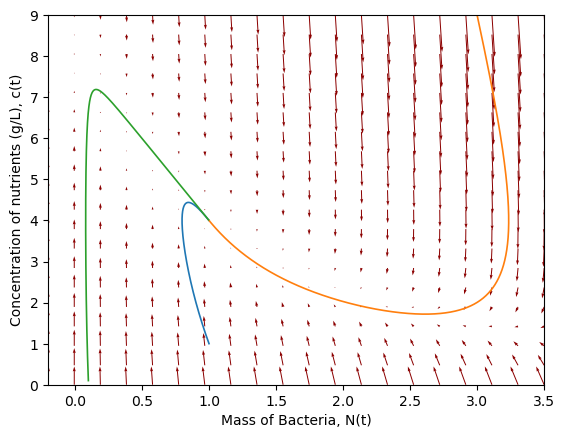

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize as so
from plotdf import plotdf
  
def f(Nc,c0=1,Rmax=1,Km=1,y=1,q=1):
    dNdt = (Rmax*Nc[1]/(Km+Nc[1]))*Nc[0]-q*Nc[0]
    dcdt = q*c0-q*Nc[1]-(Rmax*Nc[1]/(Km+Nc[1]))*(Nc[0]/y)
    return np.array([dNdt,dcdt])

plotdf(f, np.array([-0.2,3.5]), np.array([0,9]),  inits=[(1,1),(3,9),(0.1,0.1)], 
     parameters={"c0":8,"Rmax":2,"Km":4,"y":0.25,"q":1},
     tmax=20, nsteps=10000, tdir='forward', gridsteps=20)

plt.xlabel("Mass of Bacteria, N(t)");
plt.ylabel("Concentration of nutrients (g/L), c(t)");

3. In words with a text cell, describe all important aspects of your phase portrait. How many steadystates exists? Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of nutrients? Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of bacteria? 

##### _For the solved portiat phase, we see two steady state solutions. For $N^0\leqslant N_{steady state}$ and $c^0<c_{steady state}$, that is for (0.1, 0.1) and(1,1) we can expect our chemostat to overshoot the steady state concentration of nutrients, as it approaches unstable steadystate first and then to the stable steady state value. And in case $N^0> N_{steady state}$ and $c^0\geqslant c_{steady state}$ that is for (3,9) we can expect our chemostat to overshoot the steady state concentration of bacteria as it will move away from steadystate first and then come to steadystate as seen in trajectory_.

4. As a hint for the part above, two steadystates exist. Perform an eigenvalue and eigenvector analysis on both. Add a point to your phase portrait indicating if the steadystate is stable (closed point) or unstable (open point). And add arrows indicating the directions of the corresponding eigenvectors. Make the length of the arrows correspond to the size of the eigenvalue.

Note that for an unstable node, the arrows should point away. For a stable node or direction, the arrows should point towards the node.

[0. 8.] [1. 4.]
[-1.          0.33333333] [[ 0.          0.24253563]
 [ 1.         -0.9701425 ]]
[-0.5 -1. ] [[ 0.24253563 -0.12403473]
 [-0.9701425   0.99227788]]


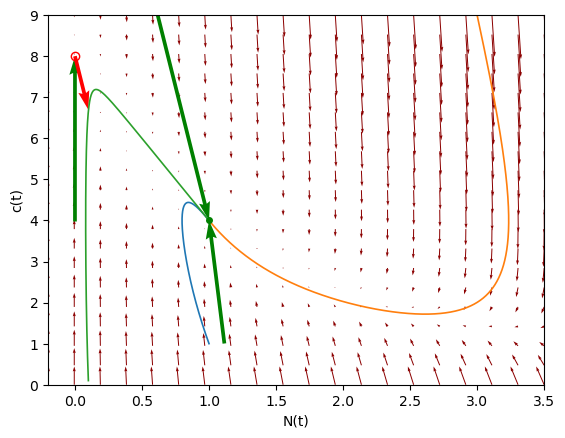

In [2]:
import numpy as np
import scipy.optimize as so
from numpy import linalg as LA

c0=8
Rmax=2
Km=4
y=0.25
q=1

def fun(vars) :
    (N,c)= vars
    f = 2*c*N/(4+c)-N
    g = 8-c-2*c*N/((4+c)*0.25)
    return [f,g]

TRY = np.matrix([[0, 0],[1, 4]]);

ss=[];
for m in np.arange(0,2,1):
    result = so.root(fun, TRY[m,])
    ss.append(result.x)

ss1=ss[0];
ss2=ss[1];
print(ss1,ss2);

plotdf(f,np.array([-0.2,3.5]), np.array([0,9]),inits=[(1,1),(3,9),(0.1,0.1)], 
     parameters={"c0":8,"Rmax":2,"Km":4,"y":0.25,"q":1},
     tmax=20, nsteps=10000, tdir='forward', gridsteps=20,axes=None)

plt.plot(ss1[0],ss1[1], color='red', marker = 'o', linestyle = 'none',markersize=6,fillstyle='none');
plt.plot(ss2[0],ss2[1], color='green', marker = 'o', linestyle = 'none',markersize=4);

plt.xlabel("N(t)");
plt.ylabel("c(t)");


#Linearinzing around (0,8)
N1 = 0
c1 = 8
a1= Rmax*c1/(Km+c1)-q
b1= N1*Rmax*Km/(Km+c1)**2
ce1= -(Rmax*c1)/(Km+c1)*1/y
d1= -q-(N1*Rmax*Km/(Km+c1)**2)*1/y
mat1=np.array([[a1, b1],[ce1, d1]]);

e1=LA.eig(mat1);
print(e1[0], e1[1]);

evals1=e1[0];
evect1=e1[1];

ss1plot1 = np.array([ss1[0],ss1[1],evect1[0][0],evect1[1][0]]);
ss1plot2 = np.array([ss1[0],ss1[1],evect1[0][1],evect1[1][1]]);


plt.quiver(*ss1plot1,pivot='tip',scale=3,color='green');
plt.quiver(*ss1plot2,pivot='tail',scale=9,color='red');


#Linearinzing around (1,4)
N2 = 1
c2 = 4
a2= Rmax*c2/(Km+c2)-q
b2= N2*Rmax*Km/(Km+c2)**2
ce2= -(Rmax*c2)/(Km+c2)*1/y
d2= -q-(N2*Rmax*Km/(Km+c2)**2)*1/y
mat2=np.array([[a2,b2],[ce2,d2]]);

e2=LA.eig(mat2);
print(e2[0],e2[1]);

evals2=e2[0];
evect2=e2[1];

ss2plot1 = np.array([ss2[0],ss2[1],evect2[0][0],evect2[1][0]]);
ss2plot2 = np.array([ss2[0],ss2[1],evect2[0][1],evect2[1][1]]);


plt.quiver(*ss2plot1,pivot='tip',scale=2,color='green');
plt.quiver(*ss2plot2,pivot='tip',scale=4,color='green');


# Cycles in Glycolysis

Glycolysis is how cells breakdown sugars to produce energy and the concentrations of many proteins and molecules involved in this process have been shown to wax and wane over periods of time. Sel'kov proposed a simple model of glycolysis:
\begin{align}
\dot{x} = -x+ay+x^2y\\
\dot{y} = b - ay - x^2y\\
\end{align}
where x and y are nondimensionalized forms of ADP, F6P (a phosphate) and a,b > 0 are kinetic parameters. Let's explore the system dynamics for two scenarios.

1. Let a = .15 and b = 1.2. Construct a phase portrait of the system and be sure to include trajectories for (x_0,y_0) = (1,1) and (2,2).

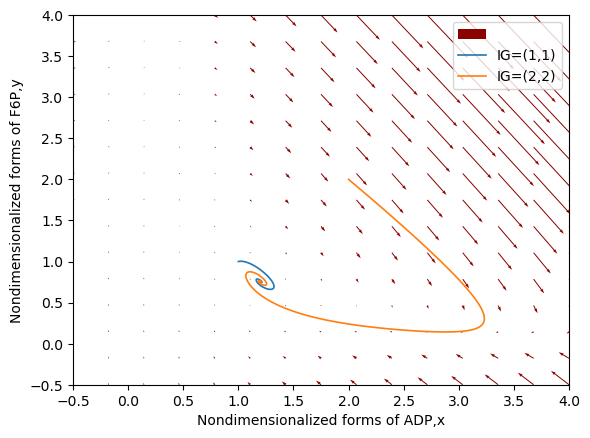

In [3]:
#Complete output

def f(xy,a=0.5,b=0.95):
    dxdt = -xy[0]+a*xy[1]+xy[0]**2*xy[1]
    dydt = b-a*xy[1]-xy[0]**2*xy[1]
    return np.array([dxdt,dydt])

plotdf(f, np.array([-0.5,4]), np.array([-0.5,4]),
     [(1,1),(2,2)], parameters={"a":0.15,"b":1.2},
     tmax=20, nsteps=10000, tdir='forward', gridsteps=15,axes=None)

plt.xlabel("Nondimensionalized forms of ADP,x");
plt.ylabel("Nondimensionalized forms of F6P,y");
plt.legend(['','IG=(1,1)', 'IG=(2,2)']);

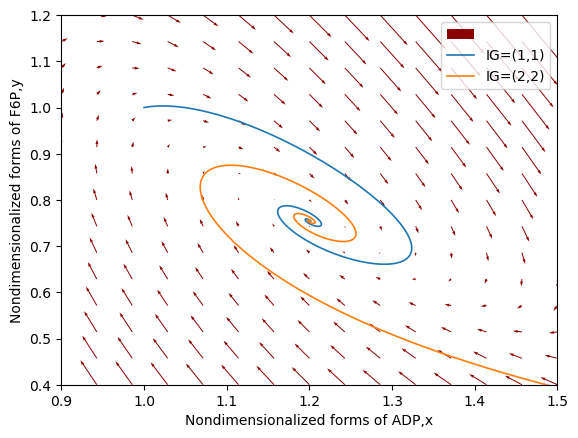

In [4]:
#Zoomed output

plotdf(f, np.array([0.9,1.5]), np.array([0.4,1.2]),
     [(1,1),(2,2)], parameters={"a":0.15,"b":1.2},
     tmax=20, nsteps=10000, tdir='forward', gridsteps=15,axes=None)

plt.xlabel("Nondimensionalized forms of ADP,x");
plt.ylabel("Nondimensionalized forms of F6P,y");
plt.legend(['','IG=(1,1)', 'IG=(2,2)']);

2. In the *text cell* below, describe the system dynamics you observed based on the phase portrait.

##### _The system has a spiral dynamics converging at the steady state value, independent of the initial values._

3. Let a = 0.04 and b = 0.6. Construct a phase portrait of the system and be sure to include trajectories for (x_0,y_0) = (1,1) and (2,2).

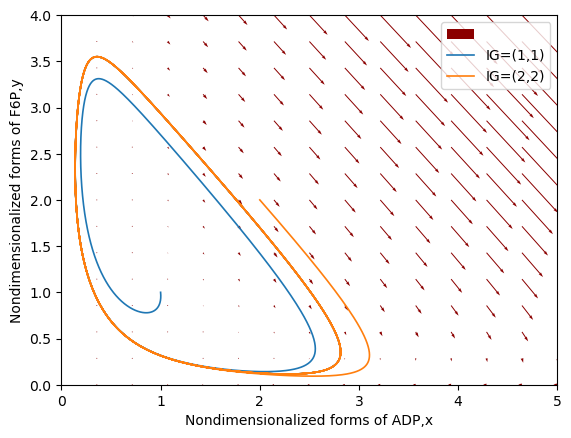

In [5]:
def f(xy,a=0.5,b=0.5):
    dxdt = -xy[0]+a*xy[1]+xy[0]**2*xy[1]
    dydt = b-a*xy[1]-xy[0]**2*xy[1]
    return np.array([dxdt,dydt])

plotdf(f, np.array([0,5]), np.array([0,4]), [(1,1),(2,2)],
     parameters={"a":0.04,"b":0.6}, gridsteps=15, nsteps = 10000, tmax=50, tdir='forward')

plt.xlabel("Nondimensionalized forms of ADP,x");
plt.ylabel("Nondimensionalized forms of F6P,y");
plt.legend(['','IG=(1,1)', 'IG=(2,2)']);

4. In the *text cell* below, describe the system dynamics you observed based on the phase portrait.

#### _The system has center dynamics, thus irrespective of the the initial value, the system will keep revolving and will not converge._

5. We have seen that steadystates with complex eigenvalues with negative real parts are oscillatory and stable. How does the dynamics of a system near a steadystate with negative real-part, complex eigenvalues differ from a limit cycle? Explain in a text cell below.

#### _When the real part is negative with the complex eigenvalue, the system behaves like a damped oscillator, such that the system oscillates and approaches the steady state value. While for limit cycle the system will keep revolving around the steady state point but will not converge to any steady state value._